# 교보문고 베스트셀러 크롤링

## 1. Import

In [1]:
import sys
import gc
import os
import re
import time
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
# import chromedriver_autoinstaller

from matplotlib import font_manager, rc
# 차트에서 한글 출력을 위한 설정

import matplotlib.pyplot as plt
import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common. by import By

from bs4 import BeautifulSoup 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import konlpy
from konlpy.tag import Kkma, Hannanum, Komoran, Mecab, Twitter

import nltk

from wordcloud import WordCloud

## 2. Set Driver

In [3]:
gc.collect()

0

In [4]:
chrome_options = webdriver.ChromeOptions()

In [5]:
chrome_driver = ## chrome_driver
driver = webdriver.Chrome(chrome_driver)

In [6]:
driver.get("http://www.kyobobook.co.kr/")
time.sleep(3)

In [ ]:
# 로그인
driver.find_element_by_link_text("로그인").click()
time.sleep(2)

## 본인 실제 교보문고 아이디, 비밀번호를 입력
# ID = ''
# PW = ''

driver.find_element_by_name('memid').send_keys(ID)
time.sleep(2)
driver.find_element_by_name('pw').send_keys(PW)
time.sleep(2)

driver.find_element_by_css_selector("input.btn_submit").click()

In [ ]:
# 베스트 단어가 있는 링크 클릭
driver.find_element_by_link_text("베스트").click()
time.sleep(3)

# 연간 베스트 확인하기 위해 이동
driver.find_element_by_link_text("연간").click() 
time.sleep(3)

In [ ]:
# 크롤링 결과값을 담을 list 생성
title_list = []
artist_list = []
ex_list= []
category_list = []
period_list = []

## 3. Crawling

제목, 저자, 설명, 카테고리, 베스트셀러 선정 기간 크롤링

In [ ]:
for k in tqdm_notebook(range(0, 10)):
    # 베스트셀러 기간 설정
    period = driver.find_elements_by_css_selector('.btn_open')[3].text
    time.sleep(1)

    for j in tqdm_notebook(range(2, 7)):
        for i in range(0, 20):
            # 링크 이동을 위해 할당
            title_links = 'ul.list_type01 > li > div.detail > div.title > a > strong'
            title_link_raw = driver.find_elements_by_css_selector(title_links)
                
            # 특이조건 설정
            if title_link_raw[i] == '참 소중한 너라서(있는 그대로)':
                pass
            else:                
                title_link_raw[i].click() # 베스트셀러 제목 링크 클릭
                time.sleep(3)

                ## 책 제목
                title = driver.find_elements_by_css_selector('div.box_detail_point > h1.title > strong')
                title_list.append(title[0].text)

                ## 저자
                artist = driver.find_elements_by_css_selector('div.box_detail_point > div.author > span > a')
                artist_list.append(artist[0].text)

                ## 책 설명
                explain = driver.find_elements_by_css_selector('div.content_middle > div.content_left  > div.box_detail_content > div.box_detail_article')
                ex_list.append(explain[0].text)

                ## 카테고리 
                categories = driver.find_elements_by_css_selector('div.content_middle > div.content_left > div.box_detail_content > ul.list_detail_category > li')
                category_list.append(categories[0].text)

                ## 기간
                period_list.append(period)

                time.sleep(2)
                driver.back() # 이전 페이지로 이동
                time.sleep(3)

        if j == 11:
            print(10, '페이지 완료!')
        else:
            print(j-1, '페이지 완료!')

        # 다음 페이지로 넘어가기
        if j == 11:
            pass
        else:
            driver.find_element_by_link_text(str(j)).click( )
            time.sleep(3)

    # 다음 기간 블록 클릭   
    period_block = driver.find_elements_by_css_selector('div.list_header > div.list_option > span ')
    period_block[2].click()
    time.sleep(3)

    # 다음 기간 클릭
    click_period = driver.find_elements_by_css_selector('div.list_header > div.list_option > span')[2].find_elements_by_css_selector('ul > li > a')
    click_period[k+1].click()
    time.sleep(3)
    print(period,'기간 완료!')

In [ ]:
# 각 list 들이 잘 생성됐는지, 길이는 같은지 확인
print(len(title_list), len(artist_list), len(ex_list), len(category_list), len(period_list))

In [ ]:
# 5개 열을 가진 DataFrame으로 생성
df = pd.DataFrame({'기간' : period_list, '제목':title_list, '저자': artist_list, '책소개' : ex_list, '카테고리' : category_list})
df.to_csv("best_books.csv",index=False, encoding="utf-8-sig")

## 4. Data Preprocessing

In [360]:
gc.collect()

873

In [8]:
## 교보문고 사이트 오류로 각각 3개의 csv로 저장하였음

a = pd.read_csv('best_books_2019~2021_top100.csv')
b = pd.read_csv('best_books_2018_top100.csv')
c = pd.read_csv('best_books.csv_~2017_top100.csv')
df = pd.concat([a, b, c], axis = 0).reset_index().iloc[:,1:]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기간      991 non-null    object
 1   제목      991 non-null    object
 2   저자      991 non-null    object
 3   책소개     991 non-null    object
 4   카테고리    991 non-null    object
dtypes: object(5)
memory usage: 38.8+ KB


In [10]:
df.isna().sum().sum()

0

In [11]:
df['기간'] = df.기간.apply(lambda x : x.split('.')[0])

In [12]:
# 카테고리 세분화
df['카테고리_대분류'] = df.카테고리.apply(lambda x : x.split('>')[0])
df['카테고리_중분류'] = df.카테고리.apply(lambda x : x.split('>')[1])

# save memory
del df['카테고리']

In [13]:
## 책소개 전처리
# get_text()함수는 태그나 마크업기호를 뺀 텍스트만 반환해줌
for i in range(len(df)):
    df['책소개'][i] = BeautifulSoup(df['책소개'][i]).get_text()

In [14]:
# 불용어와 기호등 없애기 위해 정규식 사용
for i in range(len(df)):
    df['책소개'][i] = re.sub("[^A-Za-z0-9가-힣]",           # 바꿀패턴 : 영어, 숫자, 한글이 아닌 모든것 제거
                      " ",                   # 바뀐내용:공백으로 바꿔라
                      df['책소개'][i] )  # 바꿀문서

In [15]:
df_2021 = df.query('기간 == "2021"').reset_index().iloc[:,1:]
df_2020 = df.query('기간 == "2020"').reset_index().iloc[:,1:]
df_2019 = df.query('기간 == "2019"').reset_index().iloc[:,1:]
df_2018 = df.query('기간 == "2018"').reset_index().iloc[:,1:]
df_2017 = df.query('기간 == "2017"').reset_index().iloc[:,1:]
df_2016 = df.query('기간 == "2016"').reset_index().iloc[:,1:]
df_2015 = df.query('기간 == "2015"').reset_index().iloc[:,1:]
df_2014 = df.query('기간 == "2014"').reset_index().iloc[:,1:]
df_2013 = df.query('기간 == "2013"').reset_index().iloc[:,1:]
df_2012 = df.query('기간 == "2012"').reset_index().iloc[:,1:]

## 5. WordClouding, TF-IDF Transform

In [426]:
# 불용어 지정
ko_Stopword = list(pd.read_csv('한국어 불용어.csv').불용어)

### 2021년 베스트셀러

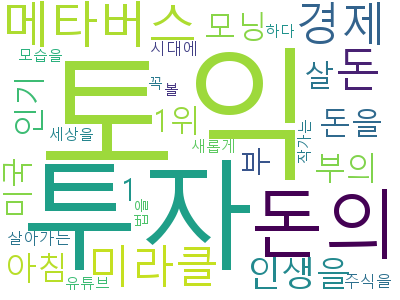

In [427]:
cv = CountVectorizer(tokenizer=nltk.word_tokenize, stop_words=ko_Stopword)

tdm_2021_책소개 = cv.fit_transform(df_2021.loc[:, '책소개'])

word_count_2021 = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm_2021_책소개.sum(axis=0).flat
})

word_count_2021.set_index('단어')['빈도']
count_dic_2021 = word_count_2021.set_index('단어')['빈도'].to_dict()

wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', 
               background_color='white', max_words=30,
               width=400, height=300, random_state = 123)

cloud_society = wc.generate_from_frequencies(count_dic_2021)
cloud_society.to_image()

In [428]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(norm = "l2", max_features = 20, stop_words=ko_Stopword)      #norm = "l2"  를 생략해도 동일
doc_term_mat = vectorizer.fit_transform(df_2021.loc[:, '책소개'])
doc_term_mat_d = doc_term_mat.toarray()

print(vectorizer.get_feature_names())
print(doc_term_mat_d)

['1위', '경제', '돈을', '돈의', '메타버스', '모닝', '미국', '미라클', '법을', '부의', '살아가는', '새롭게', '시대에', '아침', '인기', '인생을', '주식을', '토익', '투자', '하다']
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.95083663 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.18849573 0.         0.         ... 0.98207401 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


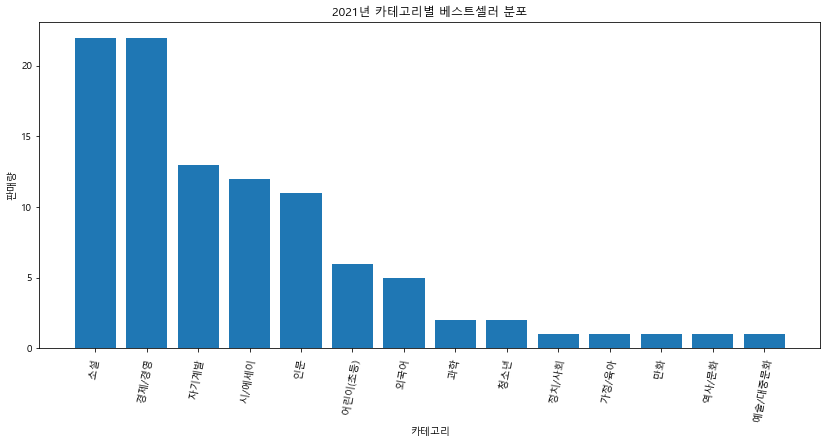

In [384]:
count_2021 = df_2021.카테고리_대분류.value_counts().reset_index()

x = count_2021['index']
y = count_2021['카테고리_대분류']

plt.figure(figsize = (14, 6))
plt.bar(x, y)
plt.xticks(rotation = 80)
plt.xlabel('카테고리')
plt.ylabel('판매량')
plt.title('2021년 카테고리별 베스트셀러 분포')
plt.show()

### 2020년 베스트셀러

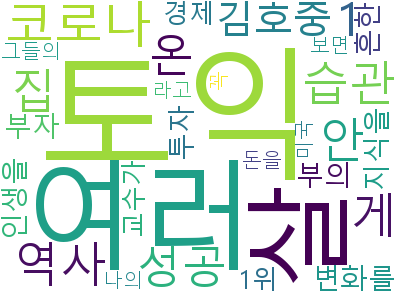

In [388]:
cv = CountVectorizer(tokenizer=nltk.word_tokenize, stop_words=ko_Stopword)

tdm_2020_책소개 = cv.fit_transform(df_2020.loc[:, '책소개'])

word_count_2020 = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm_2020_책소개.sum(axis=0).flat
})

word_count_2020.set_index('단어')['빈도']
count_dic_2020 = word_count_2020.set_index('단어')['빈도'].to_dict()

wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', 
               background_color='white', max_words=30,
               width=400, height=300, random_state = 123)

cloud_society = wc.generate_from_frequencies(count_dic_2020)
cloud_society.to_image()

In [389]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(norm = "l2", max_features = 20, stop_words=ko_Stopword)      #norm = "l2"  를 생략해도 동일
doc_term_mat = vectorizer.fit_transform(df_2020.loc[:, '책소개'])
doc_term_mat_d = doc_term_mat.toarray()

print(vectorizer.get_feature_names())
print(doc_term_mat_d)

['1위', '교수가', '그들의', '김호중', '나의', '변화를', '부의', '부자', '성공', '습관', '여러', '역사', '연구', '인생을', '지식을', '코로나', '토익', '투자', '흐름을', '흔한']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


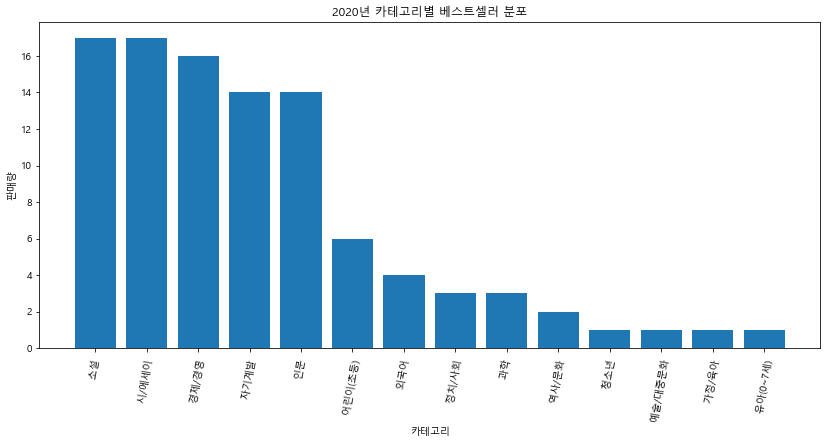

In [390]:
count_2020 = df_2020.카테고리_대분류.value_counts().reset_index()

x = count_2020['index']
y = count_2020['카테고리_대분류']

plt.figure(figsize = (14, 6))
plt.bar(x, y)
plt.xticks(rotation = 80)
plt.xlabel('카테고리')
plt.ylabel('판매량')
plt.title('2020년 카테고리별 베스트셀러 분포')
plt.show()

### 2019년 베스트셀러

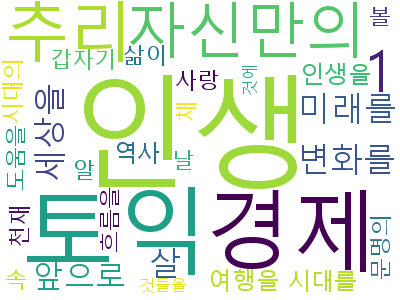

In [391]:
cv = CountVectorizer(tokenizer=nltk.word_tokenize, stop_words=ko_Stopword)

tdm_2019_책소개 = cv.fit_transform(df_2019.loc[:, '책소개'])

word_count_2019 = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm_2019_책소개.sum(axis=0).flat
})

word_count_2019.set_index('단어')['빈도']
count_dic_2019 = word_count_2019.set_index('단어')['빈도'].to_dict()

wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', 
               background_color='white', max_words=30,
               width=400, height=300, random_state = 123)

cloud_society = wc.generate_from_frequencies(count_dic_2019)
cloud_society.to_image()

In [392]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(norm = "l2", max_features = 20, stop_words=ko_Stopword)      #norm = "l2"  를 생략해도 동일
doc_term_mat = vectorizer.fit_transform(df_2019.loc[:, '책소개'])
doc_term_mat_d = doc_term_mat.toarray()

print(vectorizer.get_feature_names())
print(doc_term_mat_d)

['갑자기', '경제', '도움을', '문명의', '미래를', '변화를', '사랑', '세상을', '시대를', '시대의', '앞으로', '여행을', '역사', '인생', '인생을', '자신만의', '천재', '추리', '토익', '흐름을']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


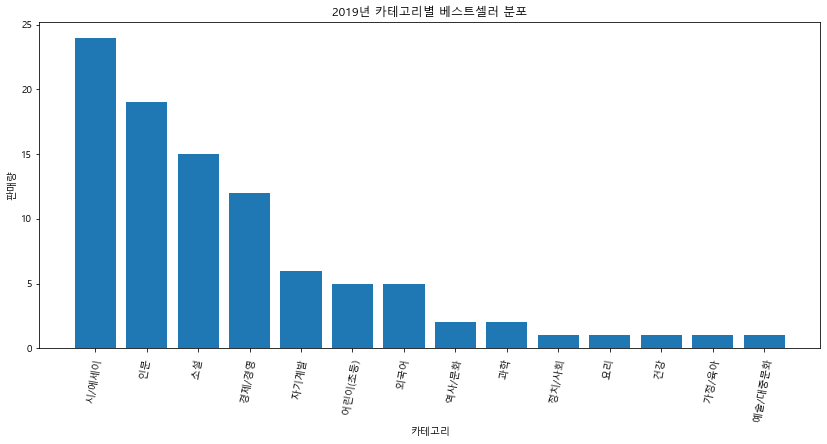

In [393]:
count_2019 = df_2019.카테고리_대분류.value_counts().reset_index()

x = count_2019['index']
y = count_2019['카테고리_대분류']

plt.figure(figsize = (14, 6))
plt.bar(x, y)
plt.xticks(rotation = 80)
plt.xlabel('카테고리')
plt.ylabel('판매량')
plt.title('2019년 카테고리별 베스트셀러 분포')
plt.show()

미중 무역갈등, 우리나라 금리 인하, 대공황 위험 등의 경제적인 이슈가 많았던 2019년

### 2018년 베스트셀러

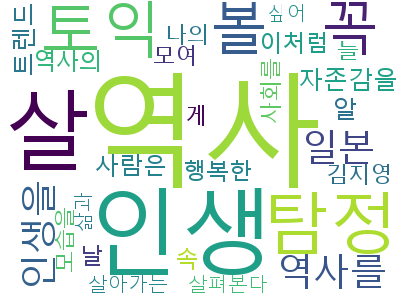

In [394]:
cv = CountVectorizer(tokenizer=nltk.word_tokenize, stop_words=ko_Stopword)

tdm_2018_책소개 = cv.fit_transform(df_2018.loc[:, '책소개'])

word_count_2018 = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm_2018_책소개.sum(axis=0).flat
})

word_count_2018.set_index('단어')['빈도']
count_dic_2018 = word_count_2018.set_index('단어')['빈도'].to_dict()

wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', 
               background_color='white', max_words=30,
               width=400, height=300, random_state = 123)

cloud_society = wc.generate_from_frequencies(count_dic_2018)
cloud_society.to_image()

In [395]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(norm = "l2", max_features = 20, stop_words=ko_Stopword)      #norm = "l2"  를 생략해도 동일
doc_term_mat = vectorizer.fit_transform(df_2018.loc[:, '책소개'])
doc_term_mat_d = doc_term_mat.toarray()

print(vectorizer.get_feature_names())
print(doc_term_mat_d)

['나의', '사람은', '살아가는', '살펴본다', '삶과', '역사', '역사를', '역사의', '의미를', '이처럼', '인생', '인생을', '일본', '자존감', '자존감을', '탐정', '토익', '트렌드', '행복한', '흐름을']
[[0.         0.         0.         ... 0.         0.72019675 0.        ]
 [1.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.64089966 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


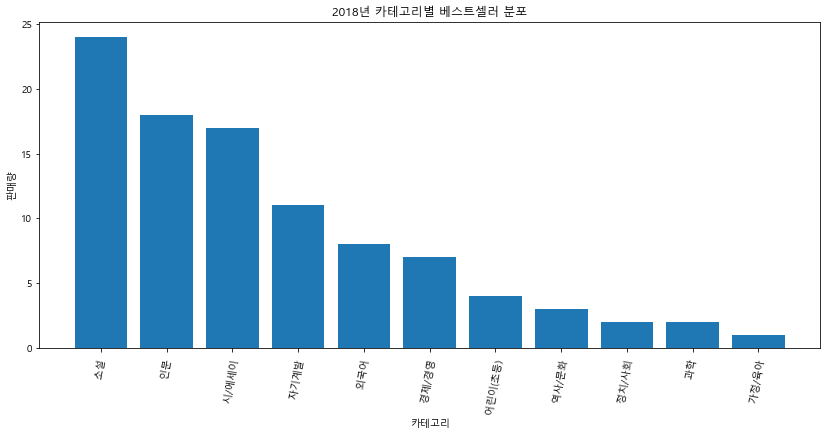

In [396]:
count_2018 = df_2018.카테고리_대분류.value_counts().reset_index()

x = count_2018['index']
y = count_2018['카테고리_대분류']

plt.figure(figsize = (14, 6))
plt.bar(x, y)
plt.xticks(rotation = 80)
plt.xlabel('카테고리')
plt.ylabel('판매량')
plt.title('2018년 카테고리별 베스트셀러 분포')
plt.show()

### 2017년 베스트셀러

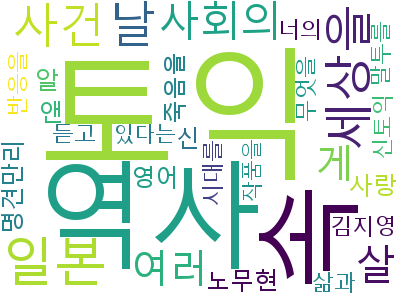

In [397]:
cv = CountVectorizer(tokenizer=nltk.word_tokenize, stop_words=ko_Stopword)

tdm_2017_책소개 = cv.fit_transform(df_2017.loc[:, '책소개'])

word_count_2017 = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm_2017_책소개.sum(axis=0).flat
})

word_count_2017.set_index('단어')['빈도']
count_dic_2017 = word_count_2017.set_index('단어')['빈도'].to_dict()

wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', 
               background_color='white', max_words=30,
               width=400, height=300, random_state = 123)

cloud_society = wc.generate_from_frequencies(count_dic_2017)
cloud_society.to_image()

In [398]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(norm = "l2", max_features = 20, stop_words=ko_Stopword)      #norm = "l2"  를 생략해도 동일
doc_term_mat = vectorizer.fit_transform(df_2017.loc[:, '책소개'])
doc_term_mat_d = doc_term_mat.toarray()

print(vectorizer.get_feature_names())
print(doc_term_mat_d)

['노무현', '듣고', '말투를', '명견만리', '무엇을', '사건', '사랑', '사회의', '삶과', '세상을', '신토익', '여러', '역사', '영어', '일본', '작품을', '주변', '죽음을', '토익', '평범한']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


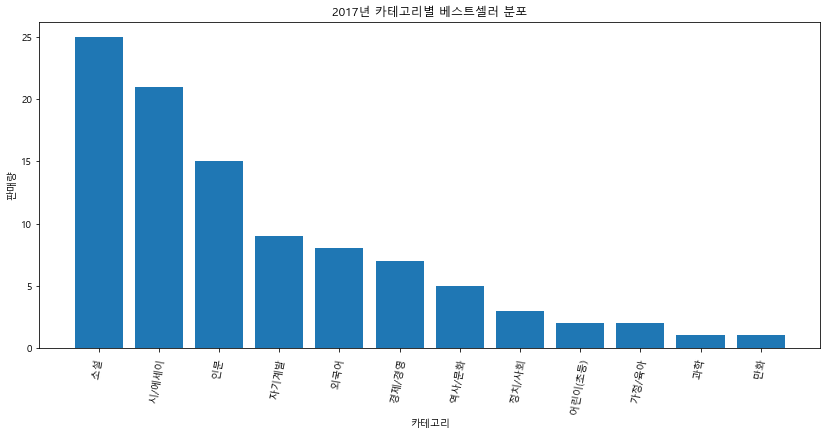

In [399]:
count_2017 = df_2017.카테고리_대분류.value_counts().reset_index()

x = count_2017['index']
y = count_2017['카테고리_대분류']

plt.figure(figsize = (14, 6))
plt.bar(x, y)
plt.xticks(rotation = 80)
plt.xlabel('카테고리')
plt.ylabel('판매량')
plt.title('2017년 카테고리별 베스트셀러 분포')
plt.show()

### 2016년 베스트셀러

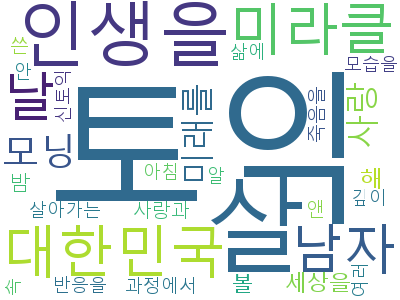

In [400]:
cv = CountVectorizer(tokenizer=nltk.word_tokenize, stop_words=ko_Stopword)

tdm_2016_책소개 = cv.fit_transform(df_2016.loc[:, '책소개'])

word_count_2016 = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm_2016_책소개.sum(axis=0).flat
})

word_count_2016.set_index('단어')['빈도']
count_dic_2016 = word_count_2016.set_index('단어')['빈도'].to_dict()

wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', 
               background_color='white', max_words=30,
               width=400, height=300, random_state = 123)

cloud_society = wc.generate_from_frequencies(count_dic_2016)
cloud_society.to_image()

In [401]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(norm = "l2", max_features = 20, stop_words=ko_Stopword)      #norm = "l2"  를 생략해도 동일
doc_term_mat = vectorizer.fit_transform(df_2016.loc[:, '책소개'])
doc_term_mat_d = doc_term_mat.toarray()

print(vectorizer.get_feature_names())
print(doc_term_mat_d)

['깊이', '남자', '대한민국', '모닝', '모습을', '미라클', '미래를', '사랑', '사랑과', '살아가는', '삶에', '세상을', '신토익', '여러', '인생에', '인생을', '죽음을', '지적', '토익', '트렌드']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


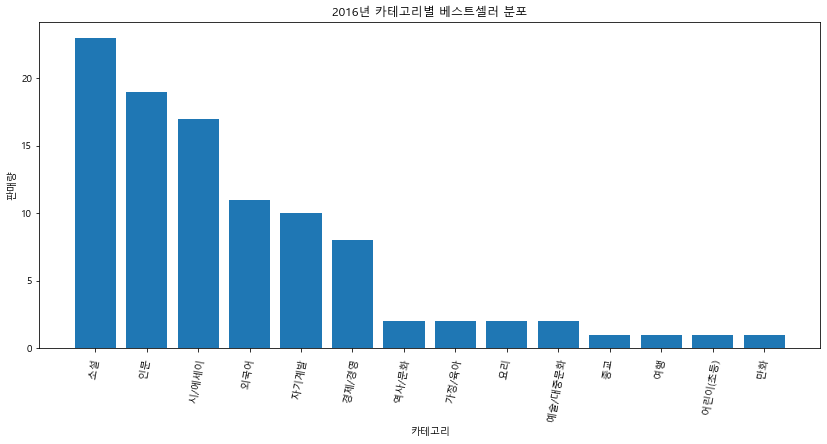

In [402]:
count_2016 = df_2016.카테고리_대분류.value_counts().reset_index()

x = count_2016['index']
y = count_2016['카테고리_대분류']

plt.figure(figsize = (14, 6))
plt.bar(x, y)
plt.xticks(rotation = 80)
plt.xlabel('카테고리')
plt.ylabel('판매량')
plt.title('2016년 카테고리별 베스트셀러 분포')
plt.show()

### 2015년 베스트셀러

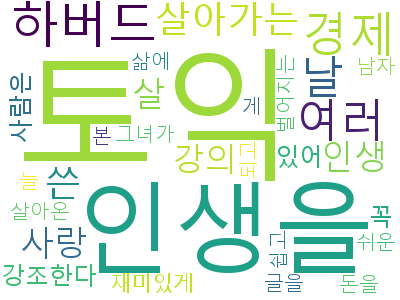

In [404]:
cv = CountVectorizer(tokenizer=nltk.word_tokenize, stop_words=ko_Stopword)

tdm_2015_책소개 = cv.fit_transform(df_2015.loc[:, '책소개'])

word_count_2015 = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm_2015_책소개.sum(axis=0).flat
})

word_count_2015.set_index('단어')['빈도']
count_dic_2015 = word_count_2015.set_index('단어')['빈도'].to_dict()

wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', 
               background_color='white', max_words=30,
               width=400, height=300, random_state = 123)

cloud_society = wc.generate_from_frequencies(count_dic_2015)
cloud_society.to_image()

In [405]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(norm = "l2", max_features = 20, stop_words=ko_Stopword)      #norm = "l2"  를 생략해도 동일
doc_term_mat = vectorizer.fit_transform(df_2015.loc[:, '책소개'])
doc_term_mat_d = doc_term_mat.toarray()

print(vectorizer.get_feature_names())
print(doc_term_mat_d)

['강의', '강조한다', '경제', '남자', '되고', '사람은', '사랑', '살아가는', '습관', '알아야', '여러', '여우', '오랜', '인생', '인생에', '인생을', '있어', '재미있게', '토익', '하버드']
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.88762214 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.99227788 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


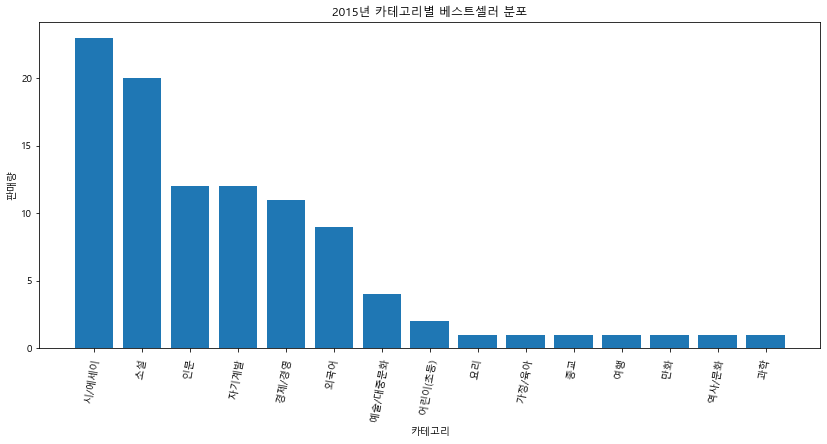

In [406]:
count_2015 = df_2015.카테고리_대분류.value_counts().reset_index()

x = count_2015['index']
y = count_2015['카테고리_대분류']

plt.figure(figsize = (14, 6))
plt.bar(x, y)
plt.xticks(rotation = 80)
plt.xlabel('카테고리')
plt.ylabel('판매량')
plt.title('2015년 카테고리별 베스트셀러 분포')
plt.show()

### 2014년 베스트셀러

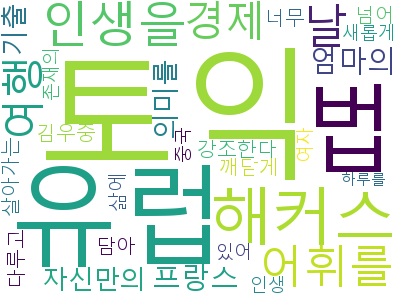

In [407]:
cv = CountVectorizer(tokenizer=nltk.word_tokenize, stop_words=ko_Stopword)

tdm_2014_책소개 = cv.fit_transform(df_2014.loc[:, '책소개'])

word_count_2014 = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm_2014_책소개.sum(axis=0).flat
})

word_count_2014.set_index('단어')['빈도']
count_dic_2014 = word_count_2014.set_index('단어')['빈도'].to_dict()

wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', 
               background_color='white', max_words=30,
               width=400, height=300, random_state = 123)

cloud_society = wc.generate_from_frequencies(count_dic_2014)
cloud_society.to_image()

In [408]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(norm = "l2", max_features = 20, stop_words=ko_Stopword)      #norm = "l2"  를 생략해도 동일
doc_term_mat = vectorizer.fit_transform(df_2014.loc[:, '책소개'])
doc_term_mat_d = doc_term_mat.toarray()

print(vectorizer.get_feature_names())
print(doc_term_mat_d)

['강조한다', '경제', '기출', '김우중', '살아가는', '어휘를', '엄마의', '여자', '여행', '유럽', '의미를', '인생을', '자신만의', '존재의', '중국', '토익', '프랑스', '하루를', '해커스', '현대']
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.15861656 0.         0.         ... 0.97622231 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


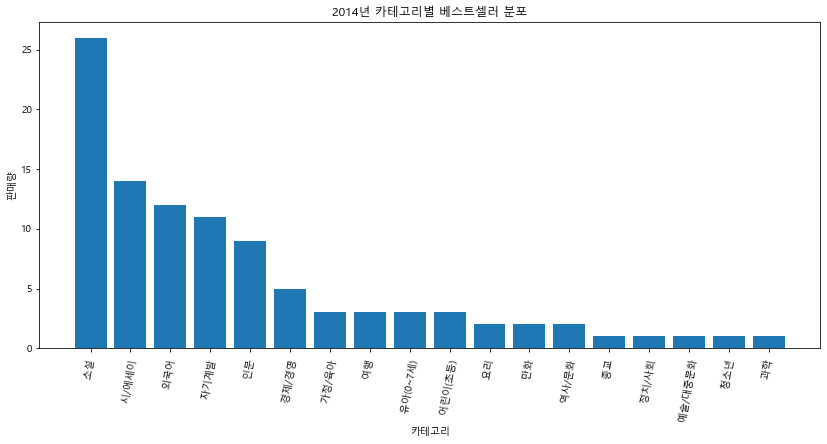

In [409]:
count_2014 = df_2014.카테고리_대분류.value_counts().reset_index()

x = count_2014['index']
y = count_2014['카테고리_대분류']

plt.figure(figsize = (14, 6))
plt.bar(x, y)
plt.xticks(rotation = 80)
plt.xlabel('카테고리')
plt.ylabel('판매량')
plt.title('2014년 카테고리별 베스트셀러 분포')
plt.show()

### 2013년 베스트셀러

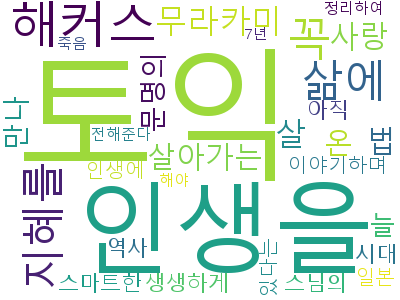

In [410]:
cv = CountVectorizer(tokenizer=nltk.word_tokenize, stop_words=ko_Stopword)

tdm_2013_책소개 = cv.fit_transform(df_2013.loc[:, '책소개'])

word_count_2013 = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm_2013_책소개.sum(axis=0).flat
})

word_count_2013.set_index('단어')['빈도']
count_dic_2013 = word_count_2013.set_index('단어')['빈도'].to_dict()

wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', 
               background_color='white', max_words=30,
               width=400, height=300, random_state = 123)

cloud_society = wc.generate_from_frequencies(count_dic_2013)
cloud_society.to_image()

In [411]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(norm = "l2", max_features = 20, stop_words=ko_Stopword)      #norm = "l2"  를 생략해도 동일
doc_term_mat = vectorizer.fit_transform(df_2013.loc[:, '책소개'])
doc_term_mat_d = doc_term_mat.toarray()

print(vectorizer.get_feature_names())
print(doc_term_mat_d)

['무라카미', '문명의', '사랑', '살아가는', '삶에', '생생하게', '스님의', '스마트한', '아직', '역사', '이야기하며', '인생을', '일본', '있다는', '정리하여', '죽음', '지혜를', '토익', '해야', '해커스']
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.92262481 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


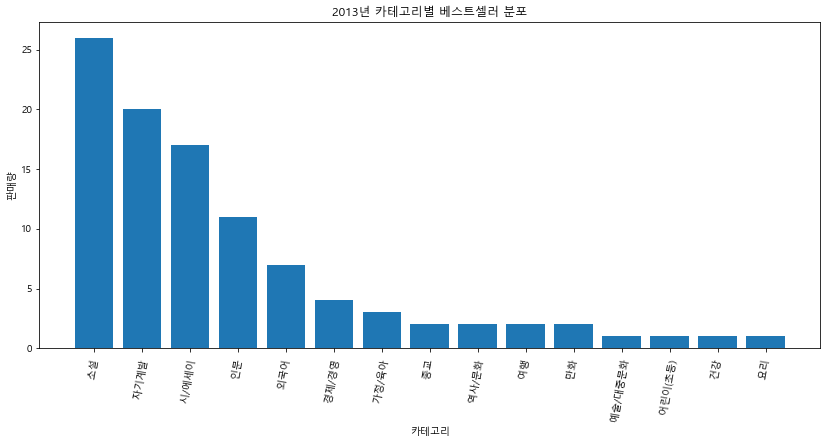

In [412]:
count_2013 = df_2013.카테고리_대분류.value_counts().reset_index()

x = count_2013['index']
y = count_2013['카테고리_대분류']

plt.figure(figsize = (14, 6))
plt.bar(x, y)
plt.xticks(rotation = 80)
plt.xlabel('카테고리')
plt.ylabel('판매량')
plt.title('2013년 카테고리별 베스트셀러 분포')
plt.show()

### 2012년 베스트셀러

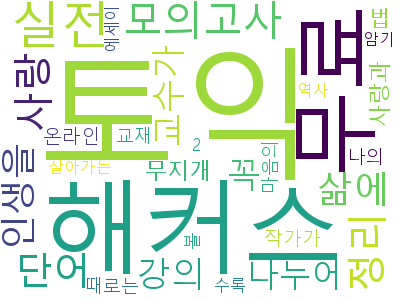

In [413]:
cv = CountVectorizer(tokenizer=nltk.word_tokenize, stop_words=ko_Stopword)

tdm_2012_책소개 = cv.fit_transform(df_2012.loc[:, '책소개'])

word_count_2012 = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm_2012_책소개.sum(axis=0).flat
})

word_count_2012.set_index('단어')['빈도']
count_dic_2012 = word_count_2012.set_index('단어')['빈도'].to_dict()

wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', 
               background_color='white', max_words=30,
               width=400, height=300, random_state = 123)

cloud_society = wc.generate_from_frequencies(count_dic_2012)
cloud_society.to_image()

In [414]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(norm = "l2", max_features = 20, stop_words=ko_Stopword)      #norm = "l2"  를 생략해도 동일
doc_term_mat = vectorizer.fit_transform(df_2012.loc[:, '책소개'])
doc_term_mat_d = doc_term_mat.toarray()

print(vectorizer.get_feature_names())
print(doc_term_mat_d)

['강의', '교수가', '교재', '나누어', '단어', '때로는', '모의고사', '무료', '무지개', '사랑', '사랑과', '삶에', '실전', '역사', '온라인', '인생을', '작가가', '정리', '토익', '해커스']
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.72008824 0.6938825  0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


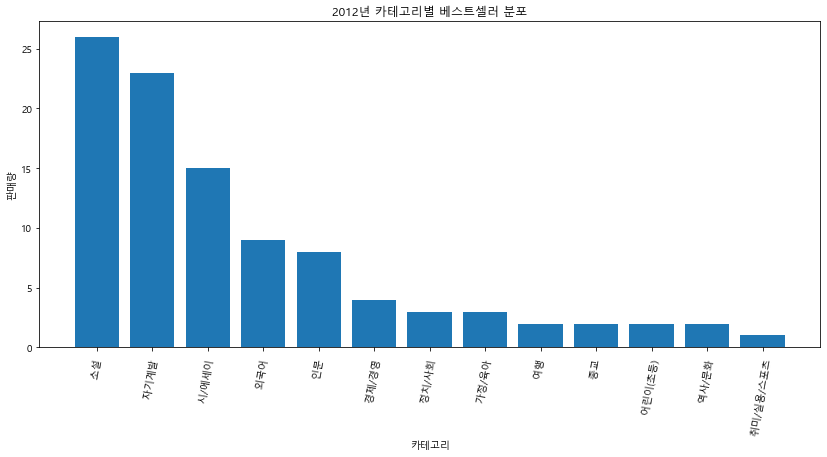

In [415]:
count_2012 = df_2012.카테고리_대분류.value_counts().reset_index()

x = count_2012['index']
y = count_2012['카테고리_대분류']

plt.figure(figsize = (14, 6))
plt.bar(x, y)
plt.xticks(rotation = 80)
plt.xlabel('카테고리')
plt.ylabel('판매량')
plt.title('2012년 카테고리별 베스트셀러 분포')
plt.show()